# Data description


Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing required libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [89]:
df = pd.read_csv('Loan_prediction.csv')

In [90]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [91]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are lot of null values in the dataset.

In [92]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [93]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

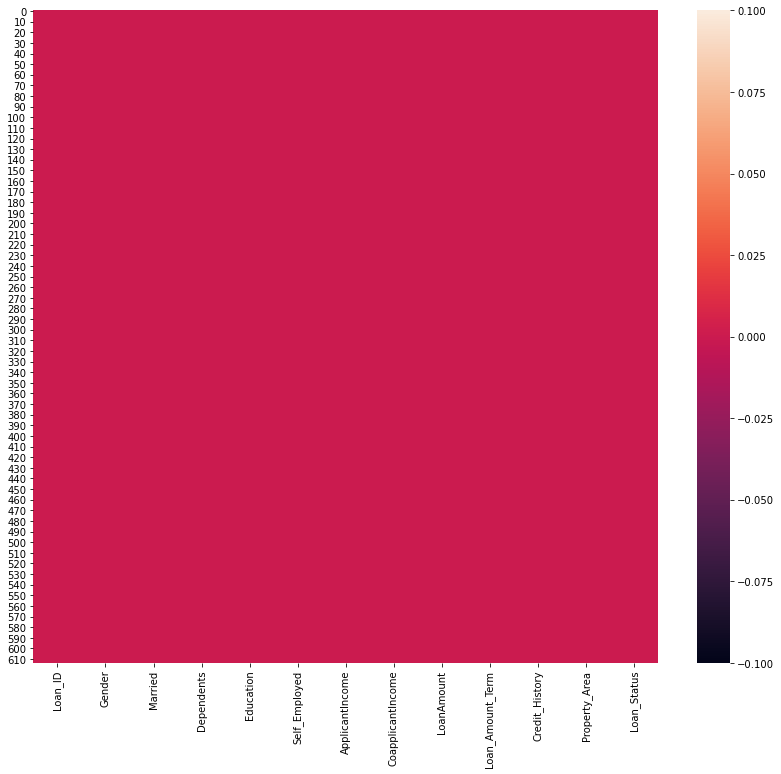

In [94]:
plt.figure(figsize=[14,12])
sns.heatmap(df.isnull())
plt.show()

In [95]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [96]:
# Dropping Loan_ID as it will not make any difference in out prediction
df.drop('Loan_ID',axis=1,inplace=True)

# Dividing the dataframe into categorical and numeric

In [97]:
df_cat = df[['Gender','Married','Education','Self_Employed','Credit_History','Property_Area', 'Loan_Status', 'Loan_Amount_Term']].copy()

In [98]:
df_num = df[['Dependents','CoapplicantIncome', 'LoanAmount']].copy()

# Data Visualization

Male      502
Female    112
Name: Gender, dtype: int64


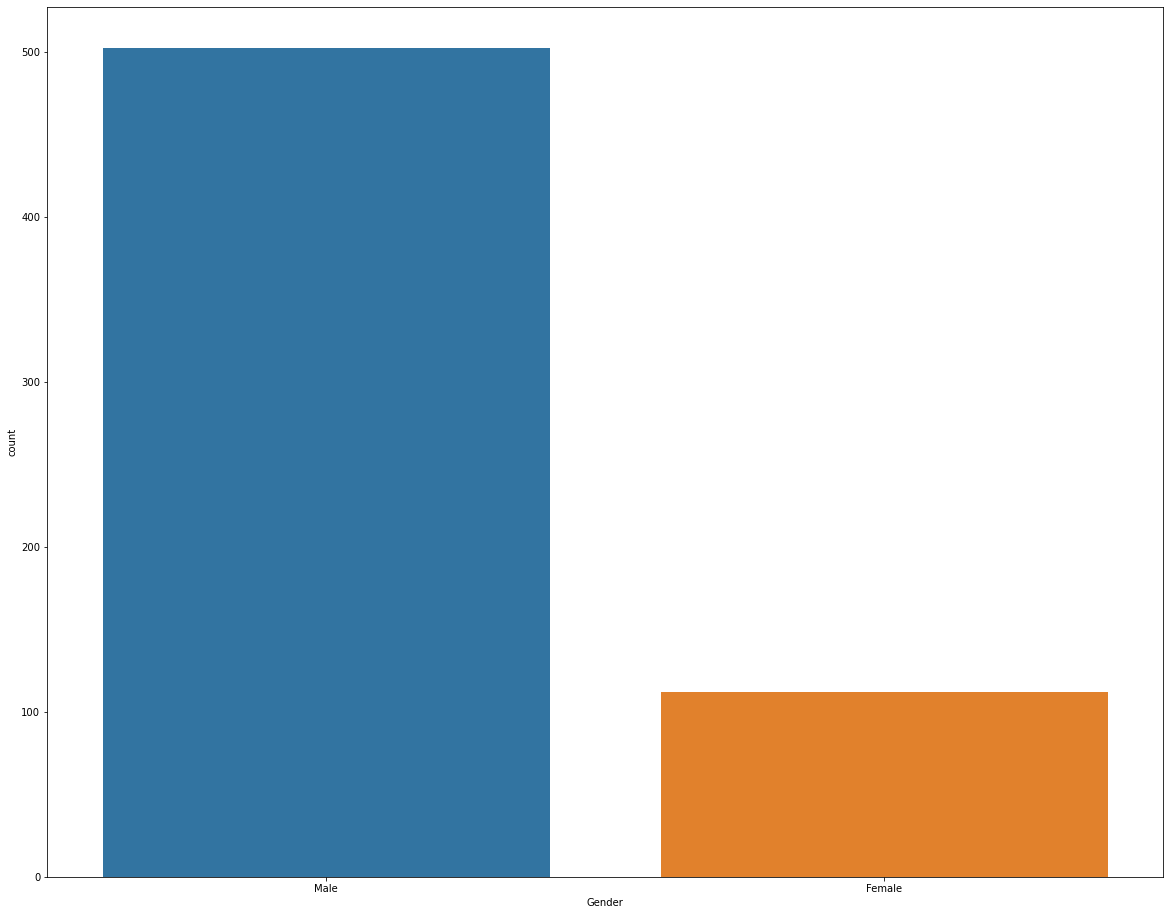

In [99]:
plt.figure(figsize=[20,16])
sns.countplot(df_cat['Gender'])
print(df['Gender'].value_counts())
plt.show()

Males are taking more loan than females.

Yes    401
No     213
Name: Married, dtype: int64


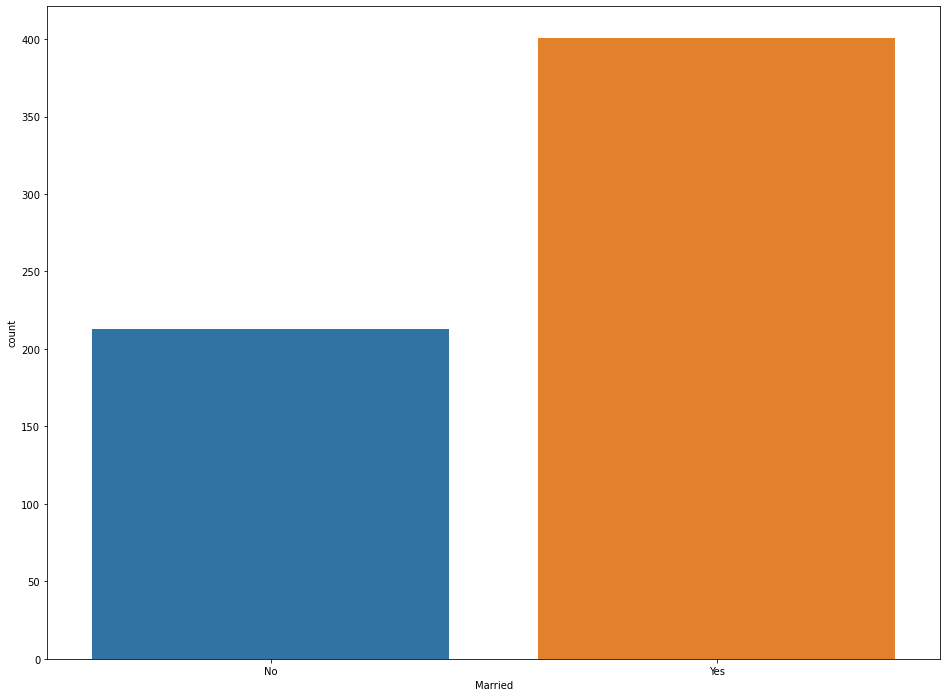

In [100]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Married'])
print(df['Married'].value_counts())
plt.show()

Married people are taking more loan as compared to Unmarried people.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


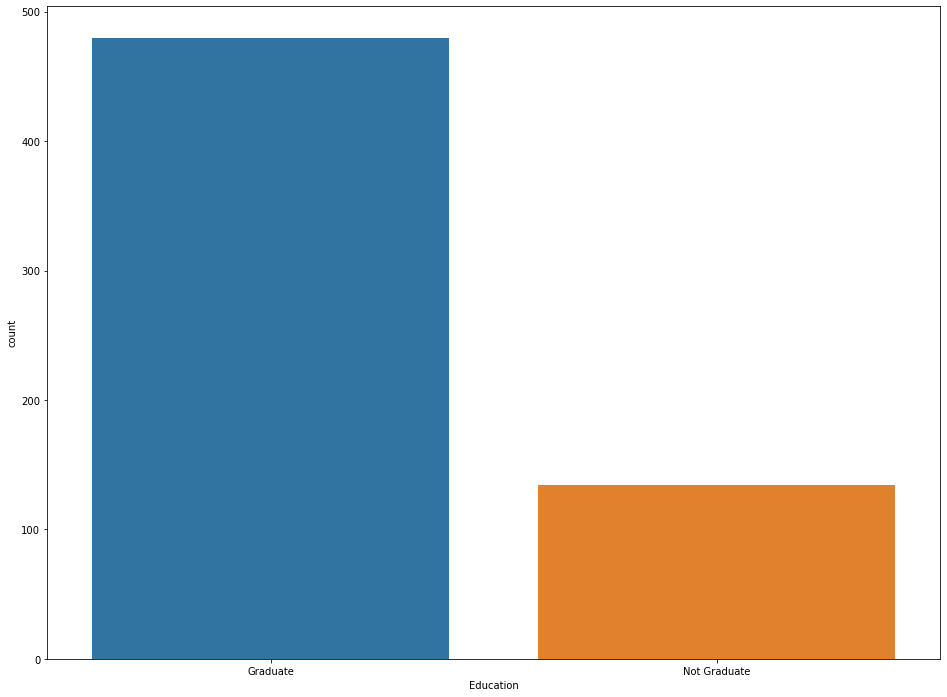

In [101]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Education'])
print(df['Education'].value_counts())
plt.show()

Graduated people are taking more loan as compared to people who are not graduate.

No     532
Yes     82
Name: Self_Employed, dtype: int64


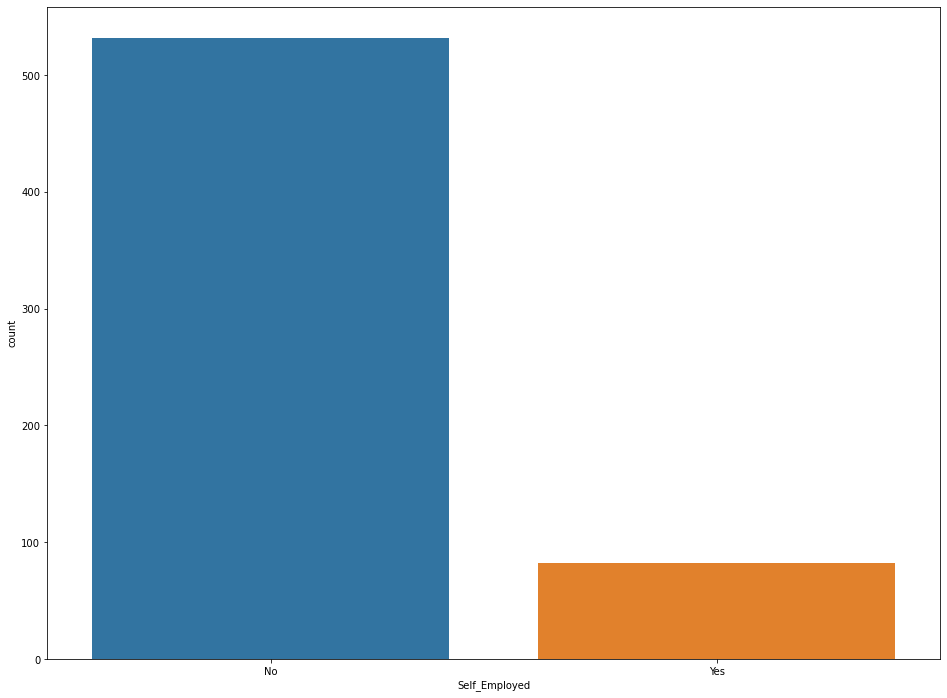

In [102]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Self_Employed'])
print(df['Self_Employed'].value_counts())
plt.show()

People who are not self employed are taking more loan as compared to people who are self employed.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


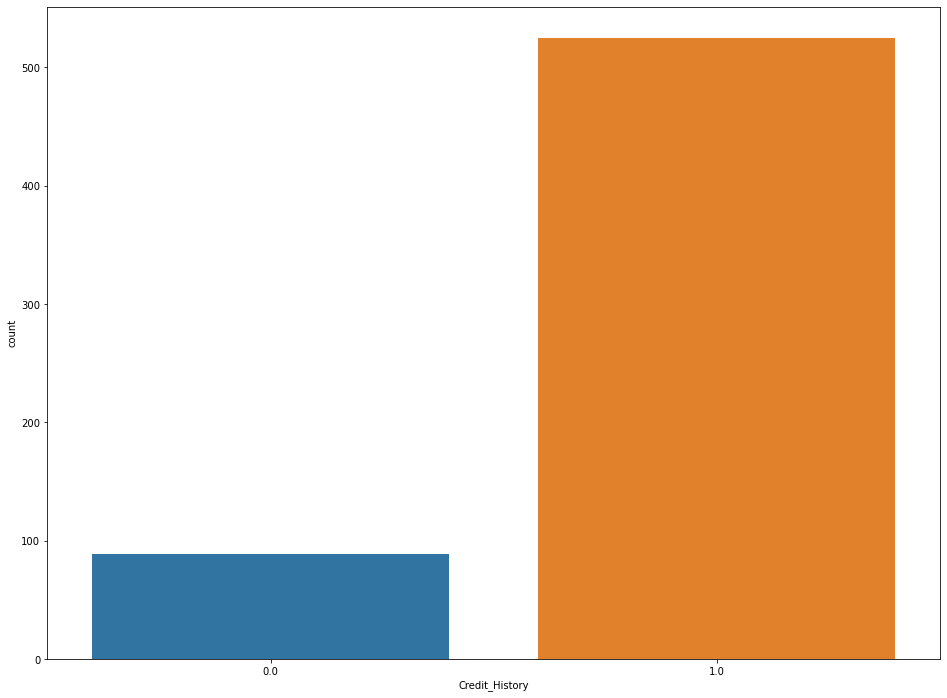

In [103]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Credit_History'])
print(df['Credit_History'].value_counts())
plt.show()

People with credit history are taking more loan

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


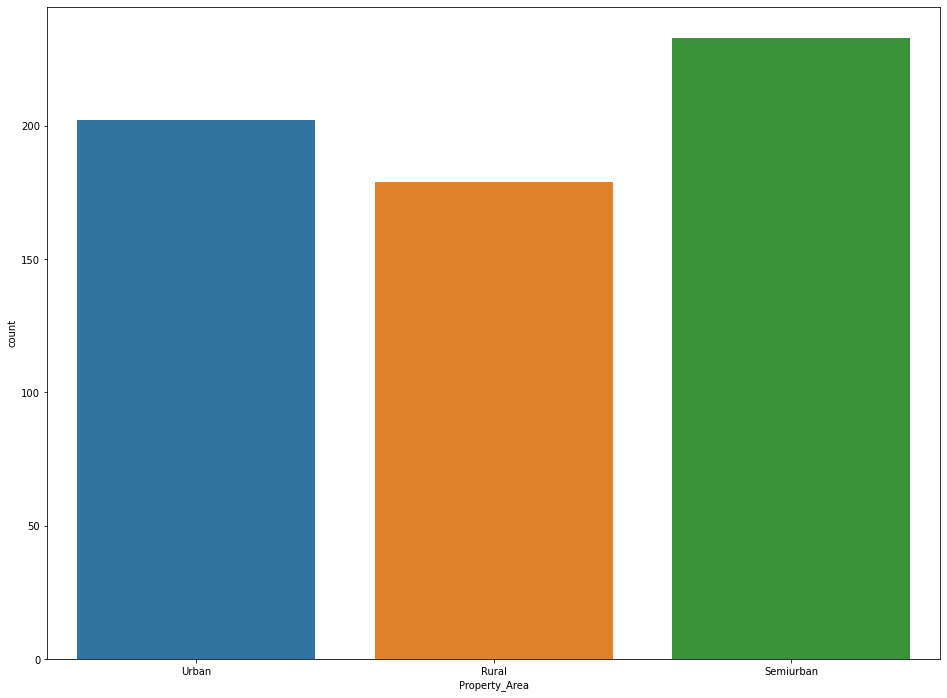

In [104]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Property_Area'])
print(df['Property_Area'].value_counts())
plt.show()

People are taking more loan for Semiurban area.

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


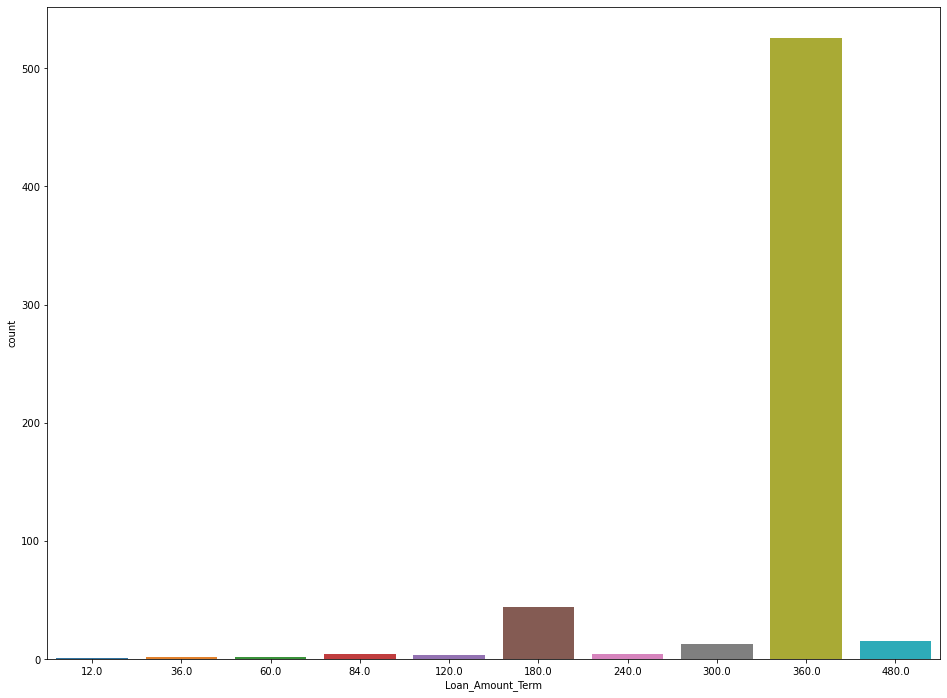

In [105]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Loan_Amount_Term'])
print(df['Loan_Amount_Term'].value_counts())
plt.show()

Y    422
N    192
Name: Loan_Status, dtype: int64


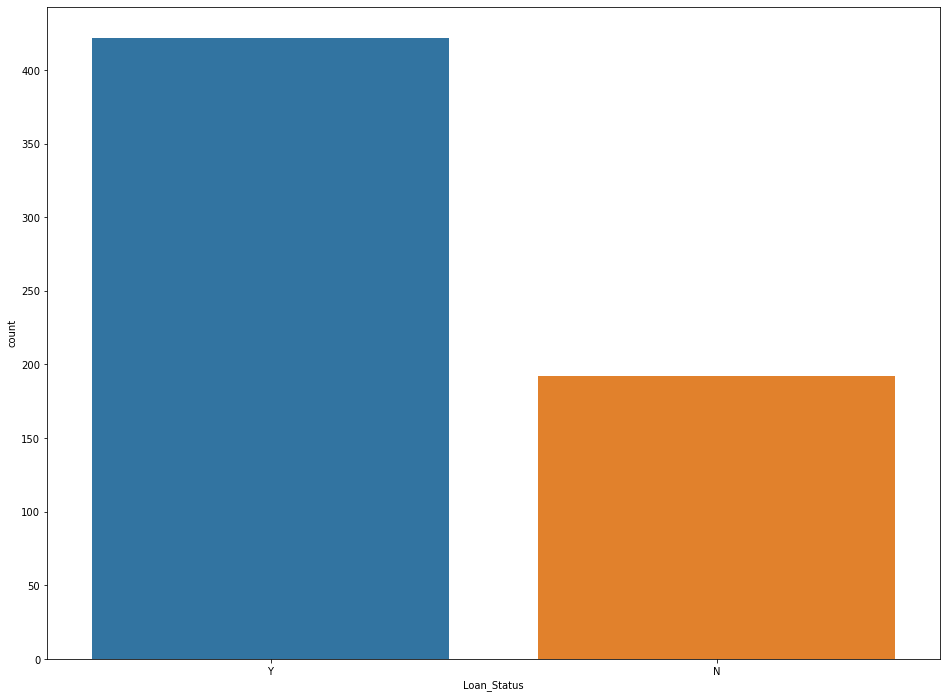

In [106]:
plt.figure(figsize=[16,12])
sns.countplot(df_cat['Loan_Status'])
print(df['Loan_Status'].value_counts())
plt.show()

422 people have got loan and 192 people have not got loan. Data seems to be balanced.

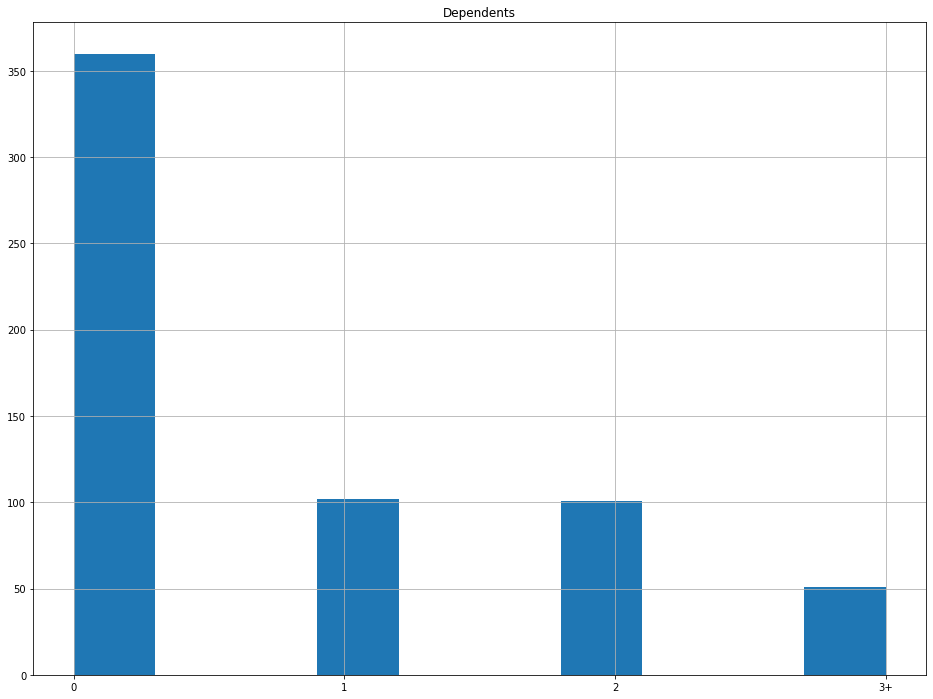

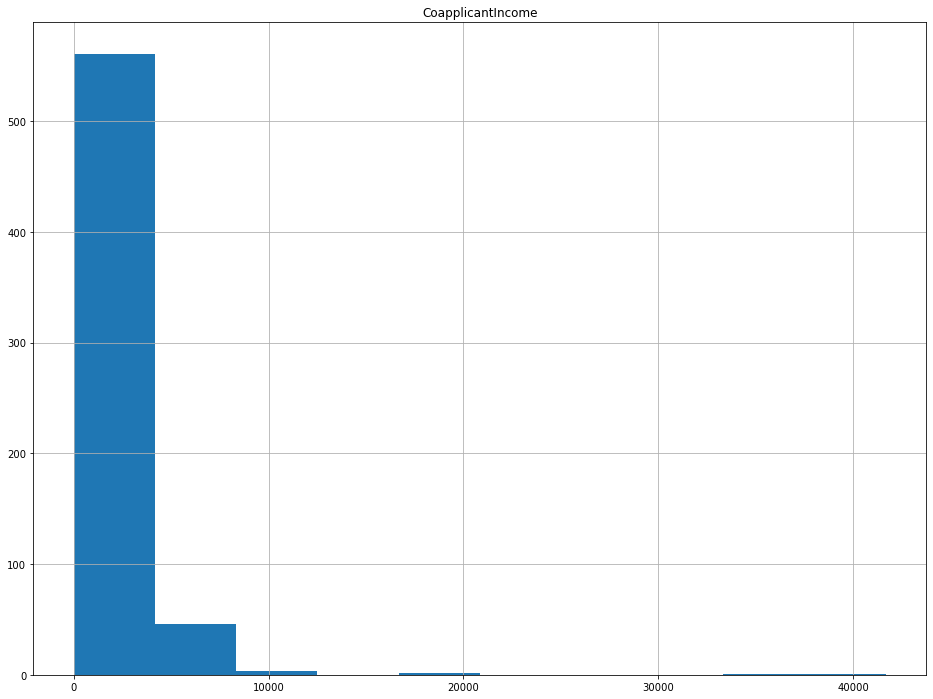

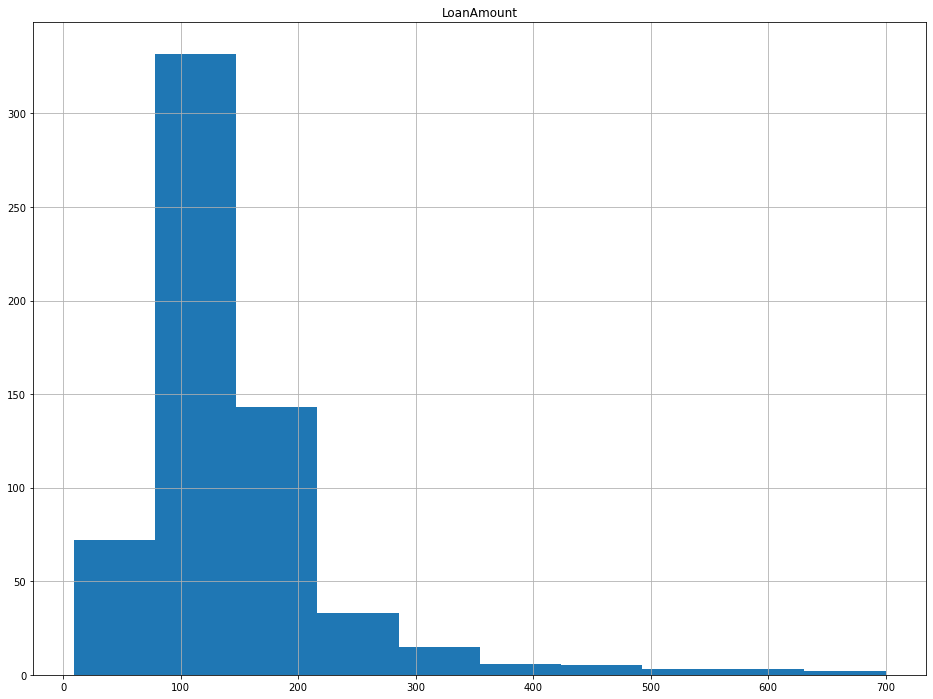

In [107]:
for i in df_num:
    plt.figure(figsize=[16,12])
    df_num[i].hist(grid=True)
    plt.title(i)
    plt.show()

Most of the people who got loan does not have any dependent.

# Encoding the Dataframe

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le=LabelEncoder()

In [110]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [111]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [112]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


There are chances of outliers and skewness in some columns

# Checking the correlation

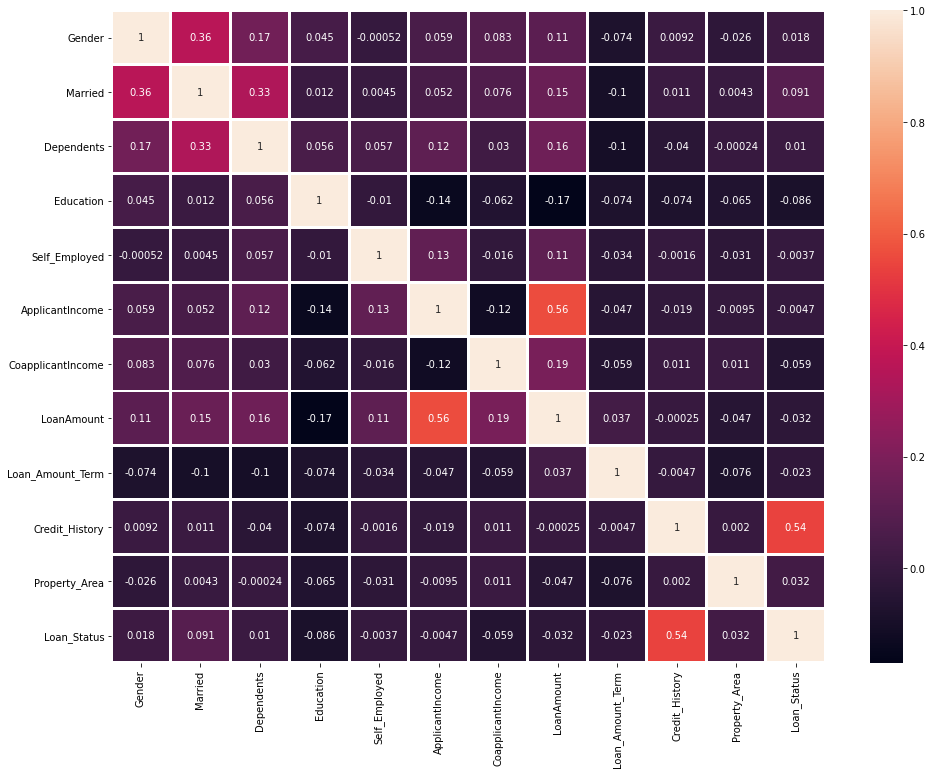

In [113]:
plt.figure(figsize=[16,12])
sns.heatmap(df.corr(),annot=True,linewidths=2.0)
plt.show()

Observations:
    
- Gender is positively correlated to Married.
- Married is positively correlated to Dependents and Gender.
- Dependents is positively correlated to Married.
- ApplicantIncome is positively correlated to LoanAmount.
- Credithistory is positvely correlated to Loan_Status.

# Checking the Outliers and data distribution

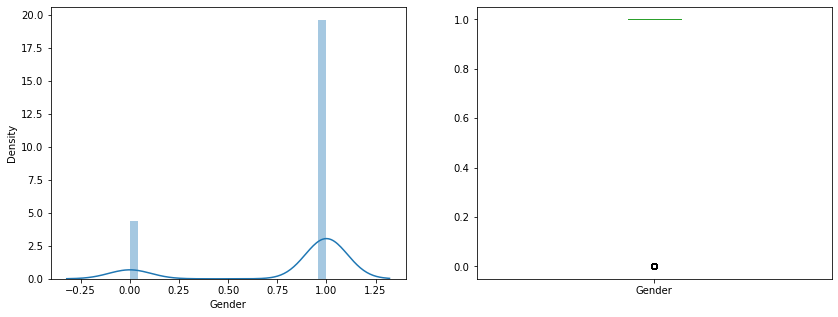

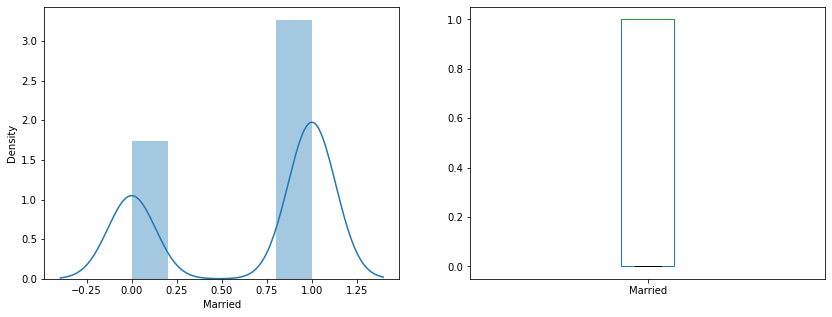

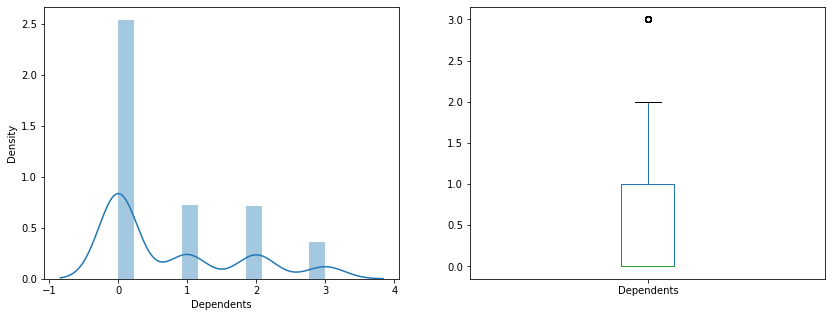

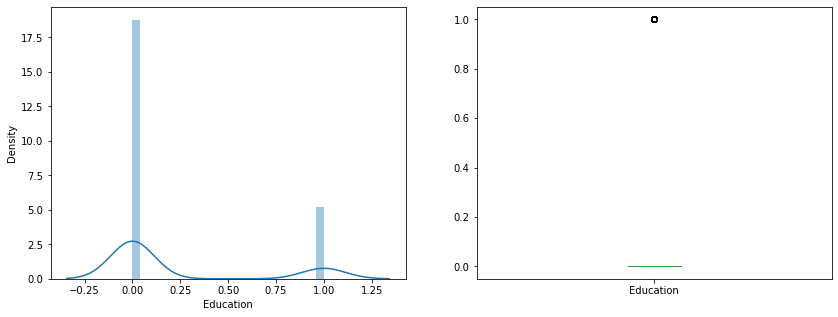

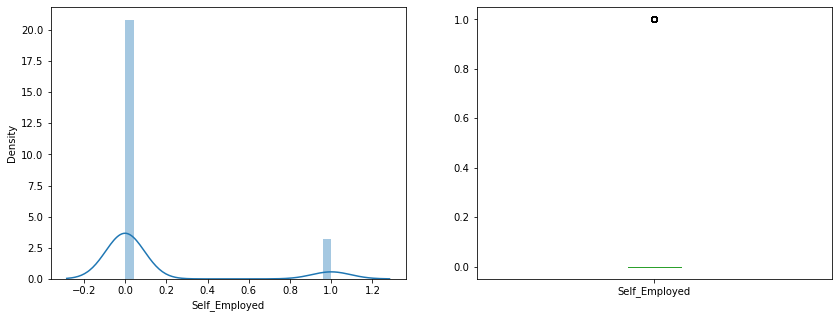

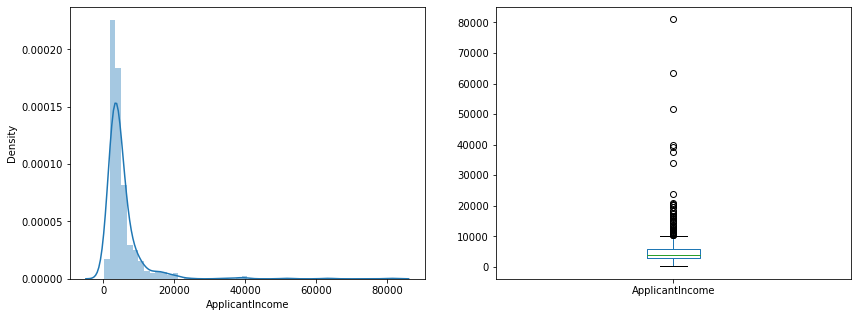

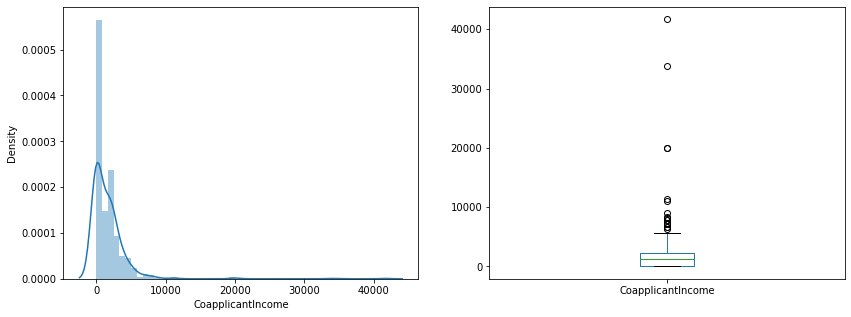

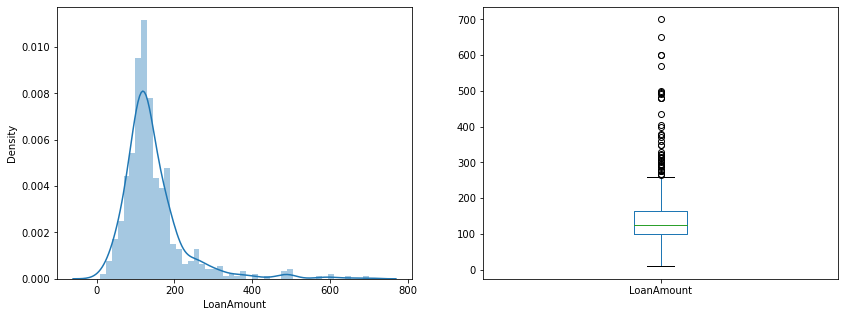

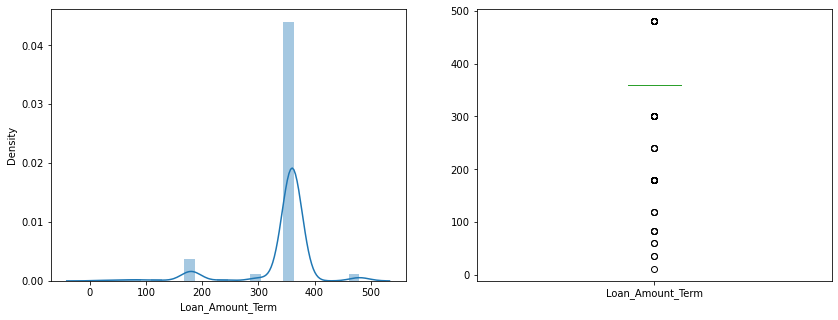

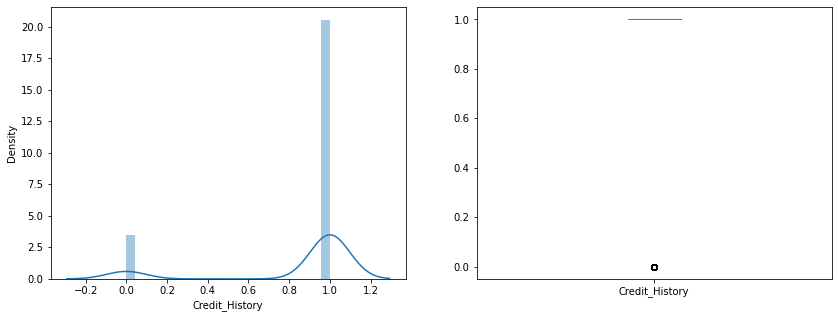

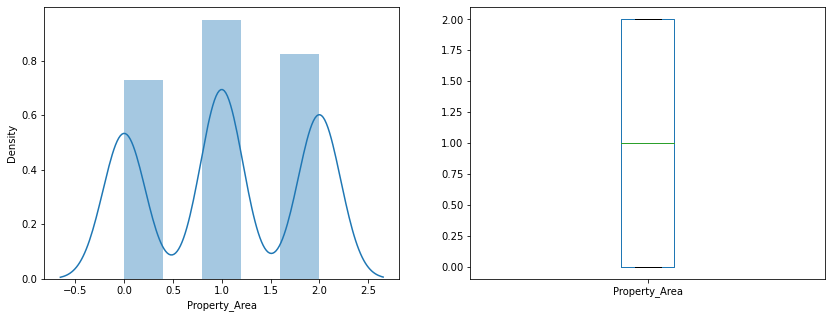

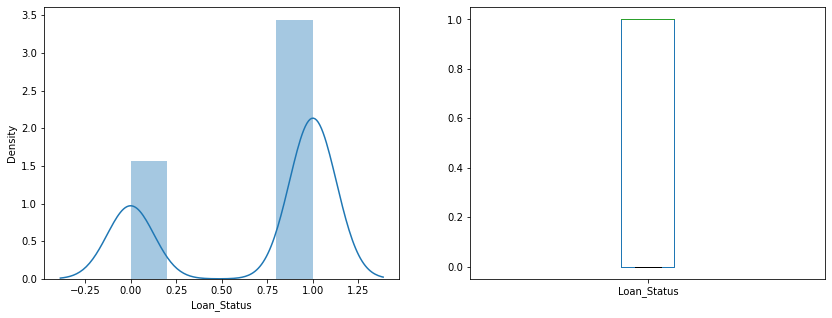

<Figure size 1008x360 with 0 Axes>

In [114]:
for i in range(0,len(df.columns)):
    plt.subplot(121)
    sns.distplot(df[df.columns[i]])
    plt.subplot(122)
    df[df.columns[i]].plot.box(figsize=(14,5))
    plt.figure(figsize=(14,5))
    
plt.show()

- Applicantincome,Coapplicantincome,LoanAmount,Loan_Amount_Term has got outliers, however, we will not remove from Loan_Amount_Term as 
we can consider it under categorical variables.

- Data also seems to be skewed in these columns.

In [115]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [116]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Removing the Outliers

In [117]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [118]:
IQR = df['ApplicantIncome'].quantile(0.75) - df['ApplicantIncome'].quantile(0.25)
lower_bridge = df['ApplicantIncome'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['ApplicantIncome'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lower_bridge),print('Upper_bridge is',upper_bridge)

Lower bridge is -1498.75
Upper_bridge is 10171.25


(None, None)

In [119]:
data=df.copy()

In [120]:
data.loc[data['ApplicantIncome']>10171,'ApplicantIncome'] = 10171

In [121]:
IQR = df['CoapplicantIncome'].quantile(0.75) - df['CoapplicantIncome'].quantile(0.25)
lower_bridge = df['CoapplicantIncome'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['CoapplicantIncome'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lower_bridge),print('Upper_bridge is',upper_bridge)

Lower bridge is -3445.875
Upper_bridge is 5743.125


(None, None)

In [122]:
data.loc[data['CoapplicantIncome']>5743.125, 'CoapplicantIncome'] = 5743.125

In [123]:
IQR = df['LoanAmount'].quantile(0.75) - df['LoanAmount'].quantile(0.25)
lower_bridge = df['LoanAmount'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['LoanAmount'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lower_bridge),print('Upper_bridge is',upper_bridge)

Lower bridge is 3.5
Upper_bridge is 261.5


(None, None)

In [124]:
data.loc[data['LoanAmount']>261.5, 'LoanAmount'] = 261.5
data.loc[data['LoanAmount']<3.5, 'LoanAmount'] = 3.5

In [125]:
df=data

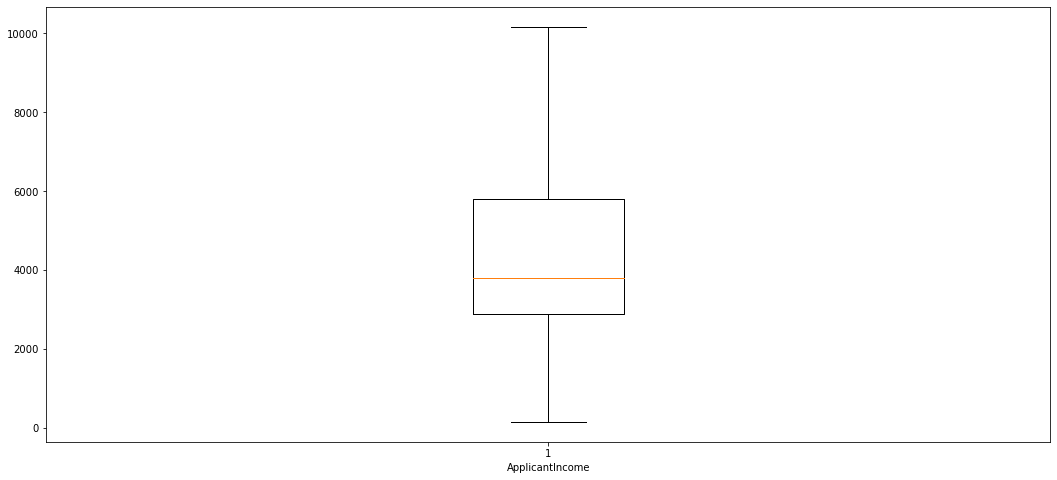

In [126]:
plt.figure(figsize=(18,8))
plt.boxplot(df['ApplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.show()

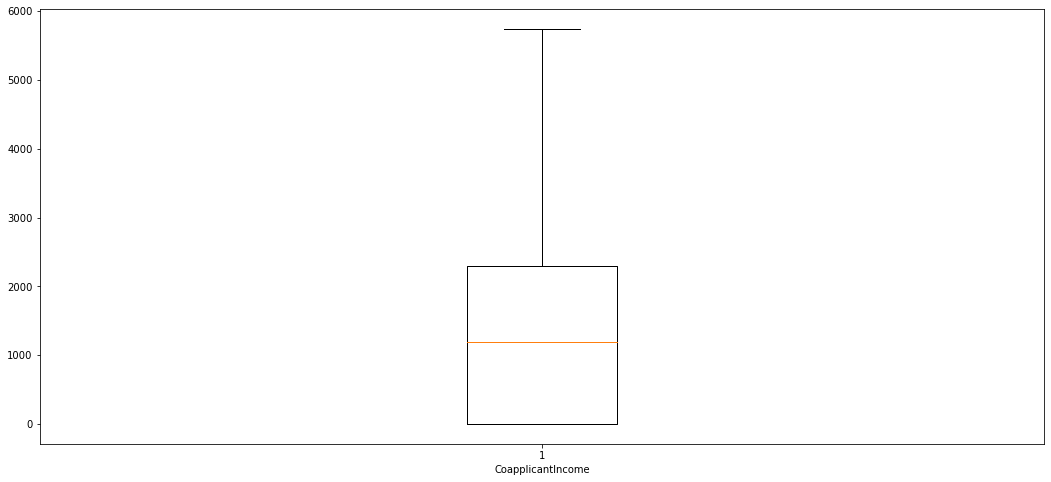

In [127]:
plt.figure(figsize=(18,8))
plt.boxplot(df['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome')
plt.show()

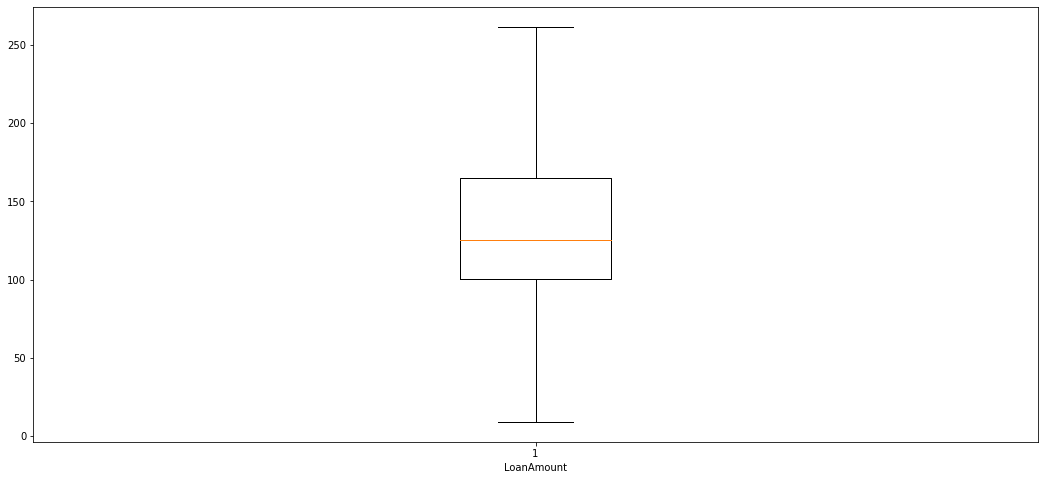

In [128]:
plt.figure(figsize=(18,8))
plt.boxplot(df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.show()

# Splitting the dataset

In [129]:
x=df.drop('Loan_Status',axis=1)

In [130]:
y=df['Loan_Status']

# Checking and removing the skewness

In [131]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      1.039804
CoapplicantIncome    1.012763
LoanAmount           0.695733
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

In [132]:
from sklearn.preprocessing import power_transform

In [133]:
pt=power_transform(x)

In [134]:
pt=pd.DataFrame(pt,columns=x.columns)

In [135]:
pt.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.035649
CoapplicantIncome   -0.164920
LoanAmount           0.026708
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.158267
dtype: float64

We can still see skewness in Gender,Married,Education,Self_Employed and Credit_History. We dont need to remove skewness from
these variable as they are categorical.

In [136]:
x=pt

# Scaling the data

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
sc=StandardScaler()

In [139]:
df_x = sc.fit_transform(x)

In [140]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [142]:
x=df_x

# Finding the best random state

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [144]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxaccu:
        maxaccu=accu
        maxRS=i
print('Best accuracy',maxaccu,'for random state',maxRS)

Best accuracy 0.8648648648648649 for random state 8


In [145]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [146]:
model = [lr,gnb,svc,rfc,dtc]

for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=83)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('Accuracy score of',i)
    print(accuracy_score(y_test,pred))
    print(f1_score(y_test,pred))
    print(precision_score(y_test,pred))
    print(recall_score(y_test,pred))
    scr = cross_val_score(i,x,y,cv=5)
    print('Cross Validation of',i,'is',scr.mean())
    print('Difference between Accuracy score and Cross Validation score is', accuracy_score(y_test,pred) - scr.mean())
    print('\t')
    print('\t')

Accuracy score of LogisticRegression()
0.8
0.8754208754208754
0.7878787878787878
0.9848484848484849
Cross Validation of LogisticRegression() is 0.809462881514061
Difference between Accuracy score and Cross Validation score is -0.009462881514060939
	
	
Accuracy score of GaussianNB()
0.8054054054054054
0.8775510204081632
0.7962962962962963
0.9772727272727273
Cross Validation of GaussianNB() is 0.8045715047314408
Difference between Accuracy score and Cross Validation score is 0.0008339006739646049
	
	
Accuracy score of SVC()
0.8054054054054054
0.8783783783783784
0.7926829268292683
0.9848484848484849
Cross Validation of SVC() is 0.8110888977742237
Difference between Accuracy score and Cross Validation score is -0.005683492368818266
	
	
Accuracy score of RandomForestClassifier()
0.8054054054054054
0.8758620689655171
0.8037974683544303
0.9621212121212122
Cross Validation of RandomForestClassifier() is 0.7883246701319473
Difference between Accuracy score and Cross Validation score is 0.017080

Least difference between Accuracy Score and Cross Validation score is given by GaussianNB

# Hyperparameter tuning of GaussianNB

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [149]:
from sklearn.preprocessing import PowerTransformer
gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='f1')
Data_transformed = PowerTransformer().fit_transform(x_train,y_train)

gs_NB.fit(Data_transformed,y_train);
print('Best Score: ', gs_NB.best_score_)
print('Best Params: ', gs_NB.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score:  0.878332114889385
Best Params:  {'var_smoothing': 0.533669923120631}


In [150]:
GNB_mod = GaussianNB(var_smoothing = 0.533669923120631)
GNB_mod.fit(x_train,y_train)
pred=GNB_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))

0.8
0.8745762711864405
0.7914110429447853
0.9772727272727273


# Hyperparameter tuning of DecisionTreeClassifier

In [154]:
parameters={"max_depth": np.arange(2,15),
           "criterion":['gini','entropy']}

In [155]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5) #Tuning DecionTreeClssifier
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [156]:
GCV.best_params_  

{'criterion': 'entropy', 'max_depth': 2}

In [157]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=8)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.0


Accuracy of DecisionTreeClassifier has drastically increased after hyperparameter tuning.

# Hyperparameter tuning of SupportVectorClassifier

In [160]:
parameters={'C':[0.1,1,10,100,1000],'kernel':['poly','rbf','sigmoid']}
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_

{'C': 0.1, 'kernel': 'sigmoid'}

In [161]:
SVC_mod=SVC(C=0.1,kernel='sigmoid')
SVC_mod.fit(x_train,y_train)
pred=SVC_mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.8


# AUC ROC Curve

In [152]:
from sklearn.metrics import roc_auc_score,roc_curve

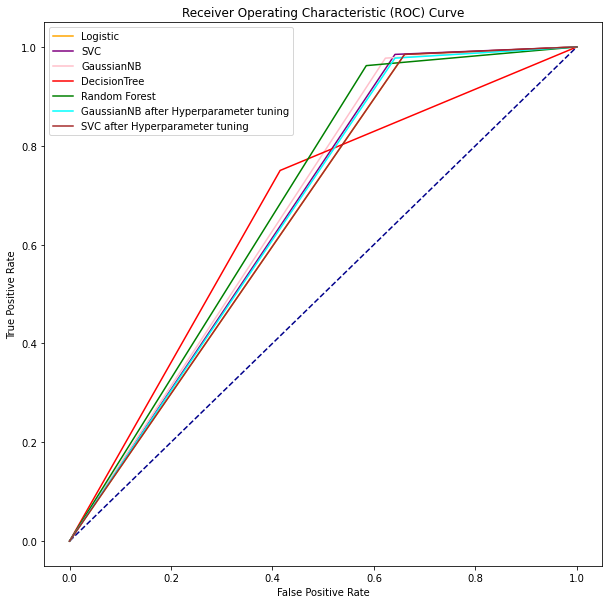

In [162]:
plt.figure(figsize = (10,10))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


fpr, tpr, thresholds = roc_curve(y_test, lr.predict(x_test))
plt.plot(fpr, tpr, color='orange', label='Logistic')

fpr1, tpr1, thresholds = roc_curve(y_test, svc.predict(x_test))
plt.plot(fpr1, tpr1, color='purple', label= 'SVC')

fpr2, tpr2, thresholds = roc_curve(y_test, gnb.predict(x_test))
plt.plot(fpr2, tpr2, color='pink', label='GaussianNB')

fpr3, tpr3, thresholds = roc_curve(y_test, dtc.predict(x_test))
plt.plot(fpr3, tpr3, color='red', label='DecisionTree')

fpr4, tpr4, thresholds = roc_curve(y_test, rfc.predict(x_test))
plt.plot(fpr4, tpr4, color='green', label='Random Forest')

fpr4, tpr4, thresholds = roc_curve(y_test,GNB_mod.predict(x_test))
plt.plot(fpr4, tpr4, color='cyan', label='GaussianNB after Hyperparameter tuning')

fpr4, tpr4, thresholds = roc_curve(y_test,SVC_mod.predict(x_test))
plt.plot(fpr4, tpr4, color='brown', label='SVC after Hyperparameter tuning')


plt.legend()
plt.show()

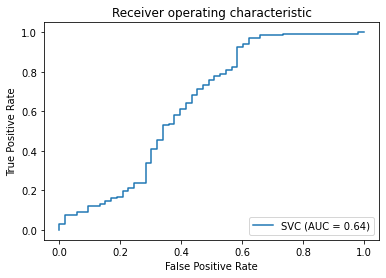

In [163]:
plot_roc_curve(SVC_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
plot_roc_curve(GNB_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

so we, GNB is our best model

# Saving the model

In [165]:
import pickle

In [166]:
filename='loanprediction.pkl'
pickle.dump(GNB_mod,open(filename,'wb'))

In [167]:
loaded_model=pickle.load(open('loanprediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8


In [168]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], GNB_mod.predict(x_test)[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
Predicted,1,1,1,1,1,0,1,0,1,1,...,0,1,0,0,1,1,1,1,1,1
Original,1,1,1,1,1,0,1,0,1,1,...,0,1,0,0,1,1,1,1,1,1
